Credit card fraud detection:

> using outlier detection algorithms such as local outlier factors, isolated forest algorithm.



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
data = pd.read_csv('/content/drive/MyDrive/credit card fraud detection/creditcard.csv')

Basic dataset info

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Exploratory data analysis(EDA)

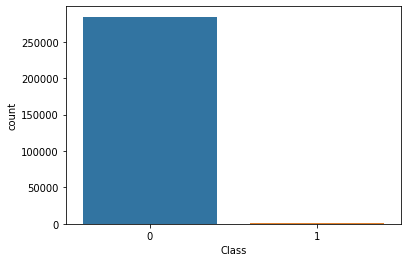

In [ ]:
#count plot to class label
sns.countplot(data['Class'])
plt.show()

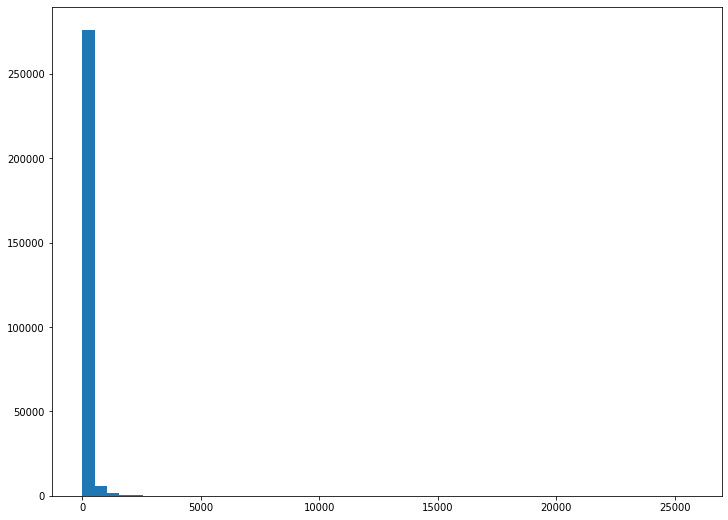

In [ ]:
#distribution of the ammount
plt.figure(figsize=(12,9))
plt.hist(data['Amount'], bins=50)
plt.show()

In [ ]:
#separate fraud and non fraud dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [ ]:
fraud.shape

(492, 31)

In [ ]:
normal.shape

(284315, 31)

In [ ]:
outlier_fractions = len(fraud)/float(len(normal))
print(outlier_fractions)

0.0017304750013189597


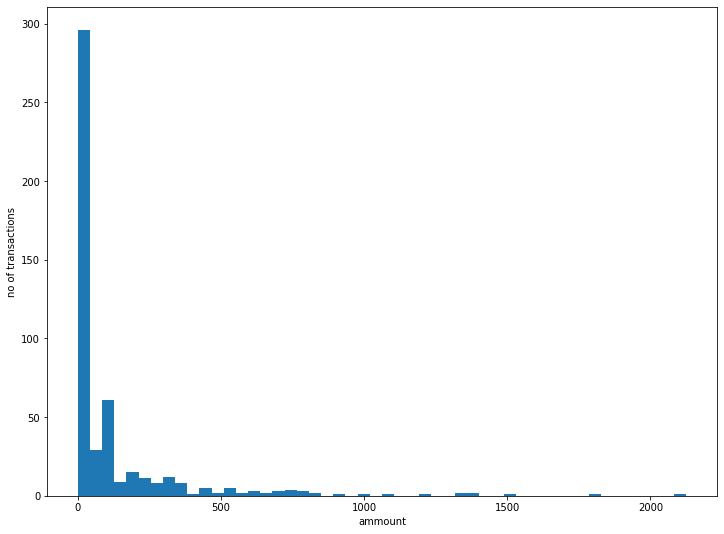

In [ ]:
#distribution of fraud dataset
plt.figure(figsize=(12,9))
plt.hist(fraud['Amount'], bins=50)
plt.xlabel('ammount')
plt.ylabel('no of transactions')
plt.show()

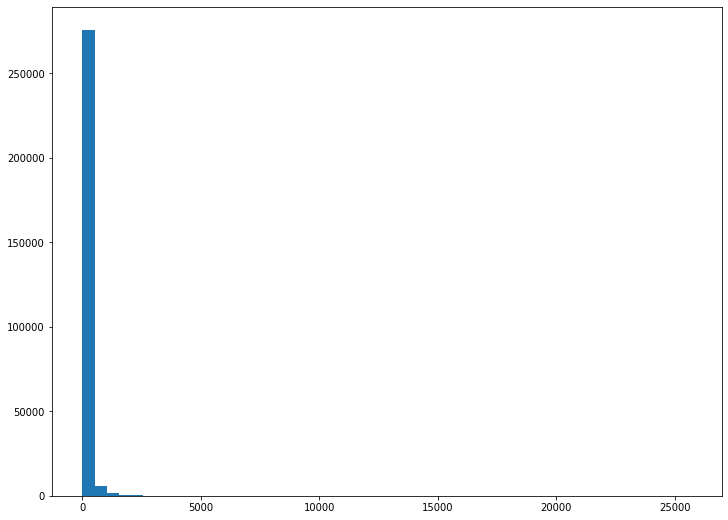

In [ ]:
#distribution of narmal transactions
plt.figure(figsize=(12,9))
plt.hist(normal['Amount'], bins=50)
plt.show()

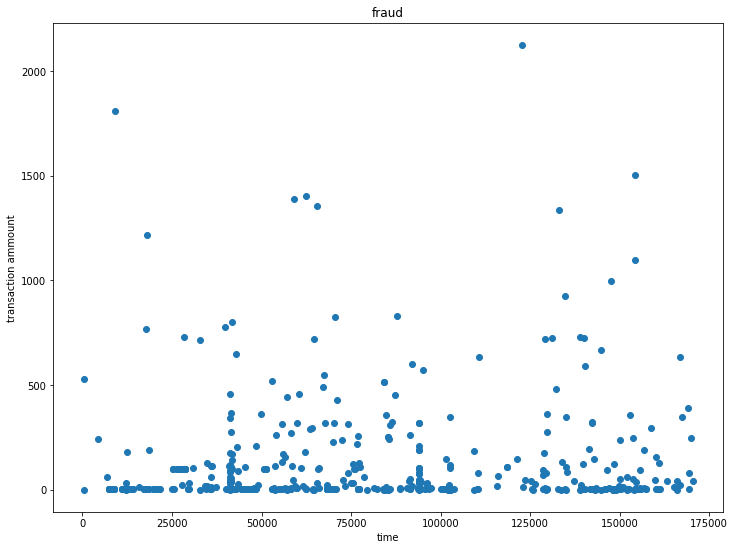

In [ ]:
#scatter plot between time and ammount
plt.figure(figsize=(12,9))
plt.scatter(fraud['Time'],fraud['Amount'])
plt.title('fraud')
plt.xlabel('time')
plt.ylabel('transaction ammount')
plt.show()

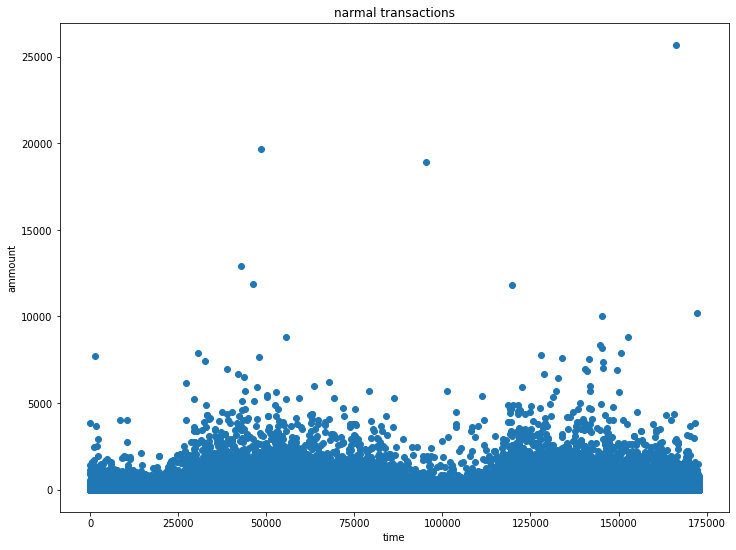

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(data['Time'],data['Amount'])
plt.title('narmal transactions')
plt.xlabel('time')
plt.ylabel('ammount')
plt.show()

In [ ]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

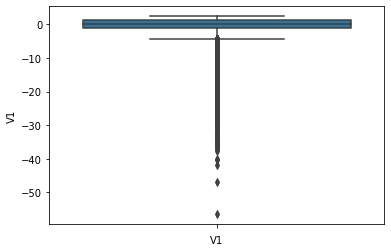

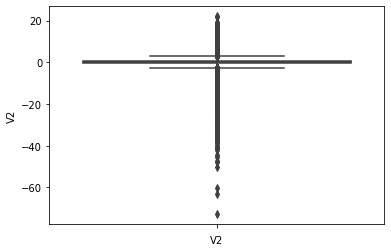

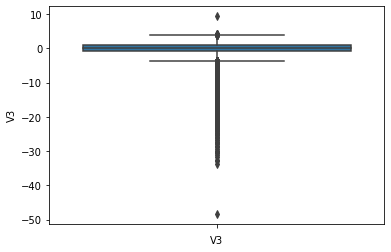

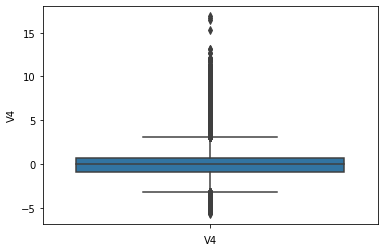

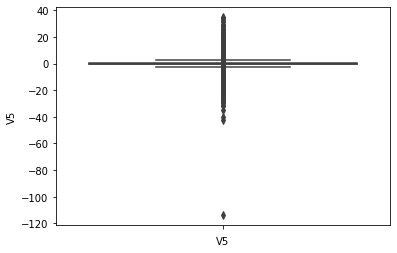

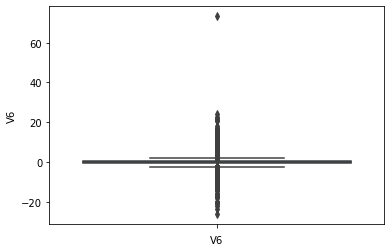

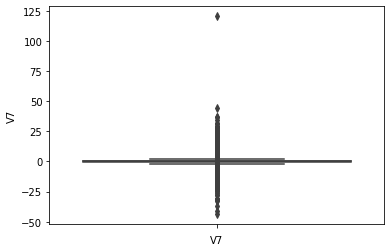

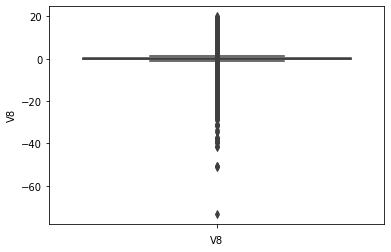

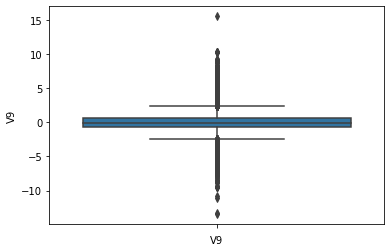

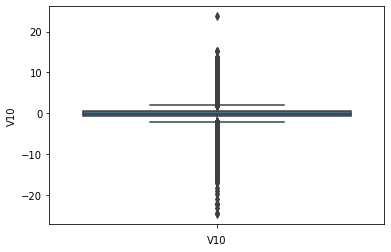

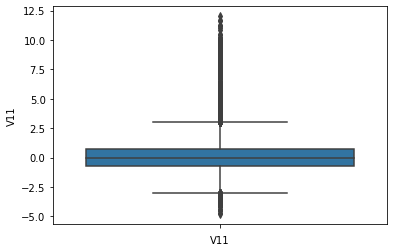

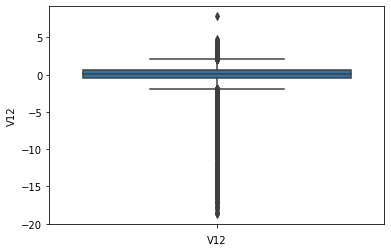

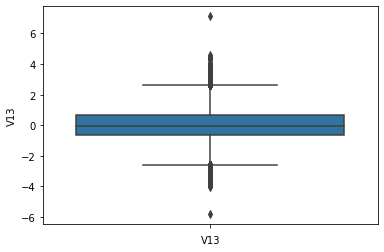

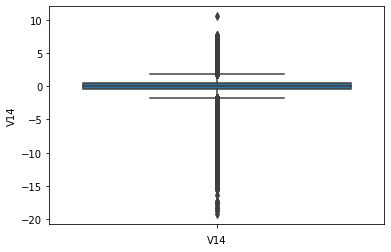

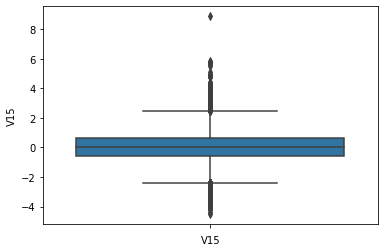

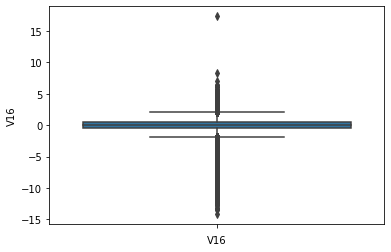

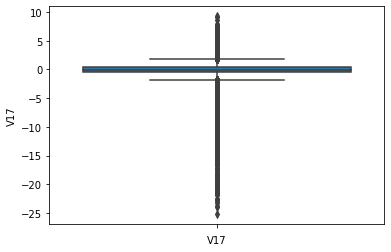

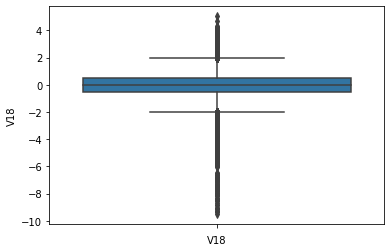

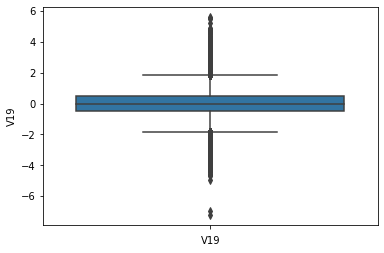

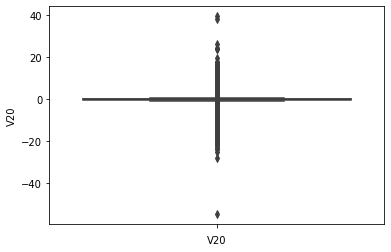

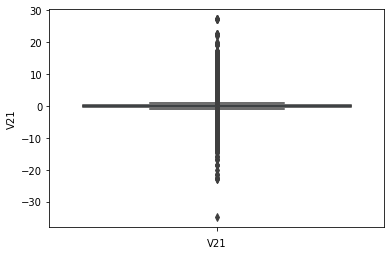

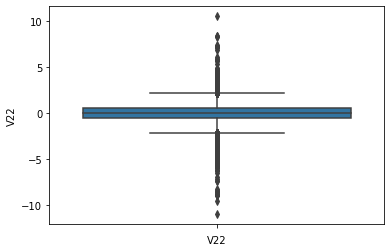

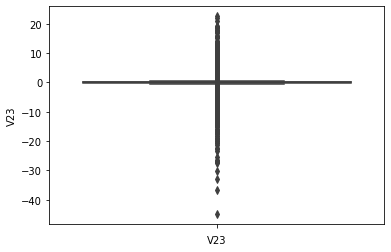

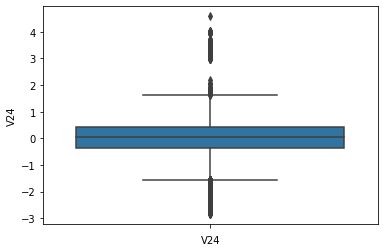

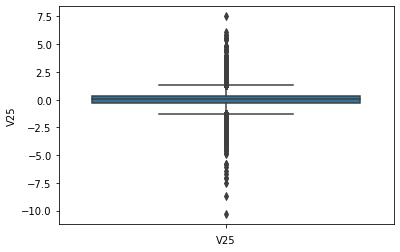

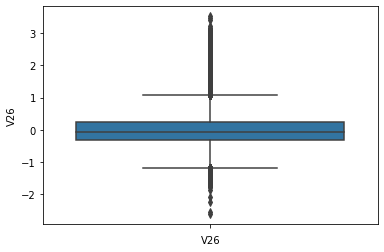

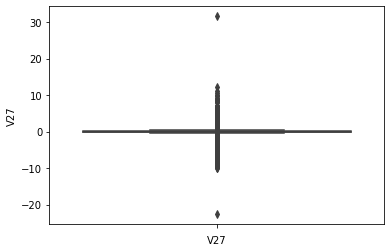

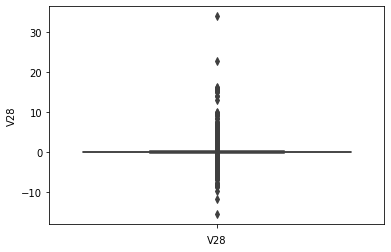

In [ ]:
#distribution of v1,v2,v3...
data1 = data.drop(['Time', 'Class', 'Amount'], axis=1)
cols = data1.columns
bins = 50
for feature in cols:
  plt.xlabel(feature)
  sns.boxplot(y=data1[feature])
  plt.show()


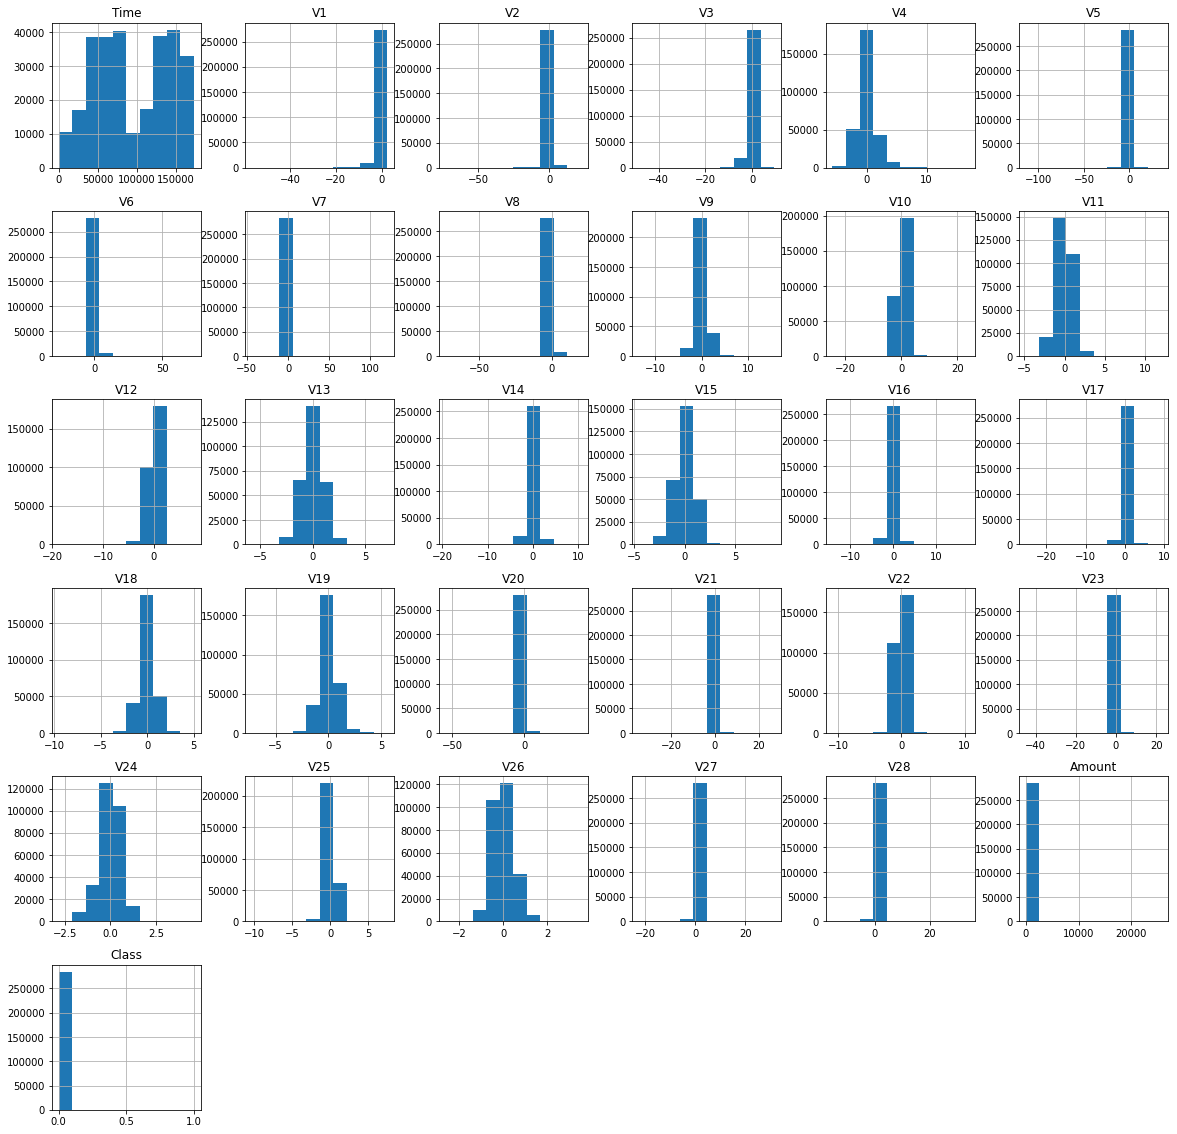

In [ ]:
#histogram
data.hist(figsize=(20,20))
plt.show()

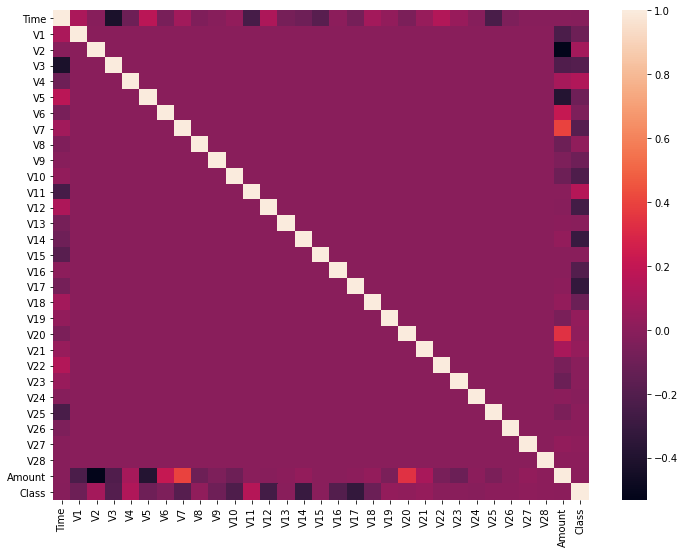

In [ ]:
#correlation matrix
cormat = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(cormat)
plt.show()

Isolated Forest Algorithm

In [ ]:
x_label = data.drop(['Class'], axis=1)
y_label = data['Class']

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
clf = IsolationForest(n_estimators=100, contamination=outlier_fractions, random_state=1)

In [ ]:
clf.fit(x_label)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.0017304750013189597, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=1, verbose=0, warm_start=False)

In [ ]:
predicted = clf.predict(x_label)

In [ ]:
predicted[predicted == 1] = 0
predicted[predicted == -1] = 1

In [ ]:
error_iforest = (y_label!=predicted).sum()
print('no of errors',error_iforest)
print(classification_report(predicted, y_label, target_names=['class 0', 'class 1']))

no of errors 699
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00    284314
     class 1       0.29      0.29      0.29       493

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(contamination = outlier_fractions)

In [ ]:
y_pred = clf.fit_predict(x_label)

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
error_lof = (y_label != y_pred).sum()
print('no of errors:', error_lof)
print(classification_report(y_pred, y_label, target_names=['class 0', 'class 1']))

no of errors: 935
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00    284314
     class 1       0.05      0.05      0.05       493

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



Obervation:


*   using isolation forest accuracy precision recall and f1_score are better than local outlier factor.



Oversapling techniques

*   logistic regression
*   svm

*   xgboost





In [12]:
#correlation between features
cor = data.corr()

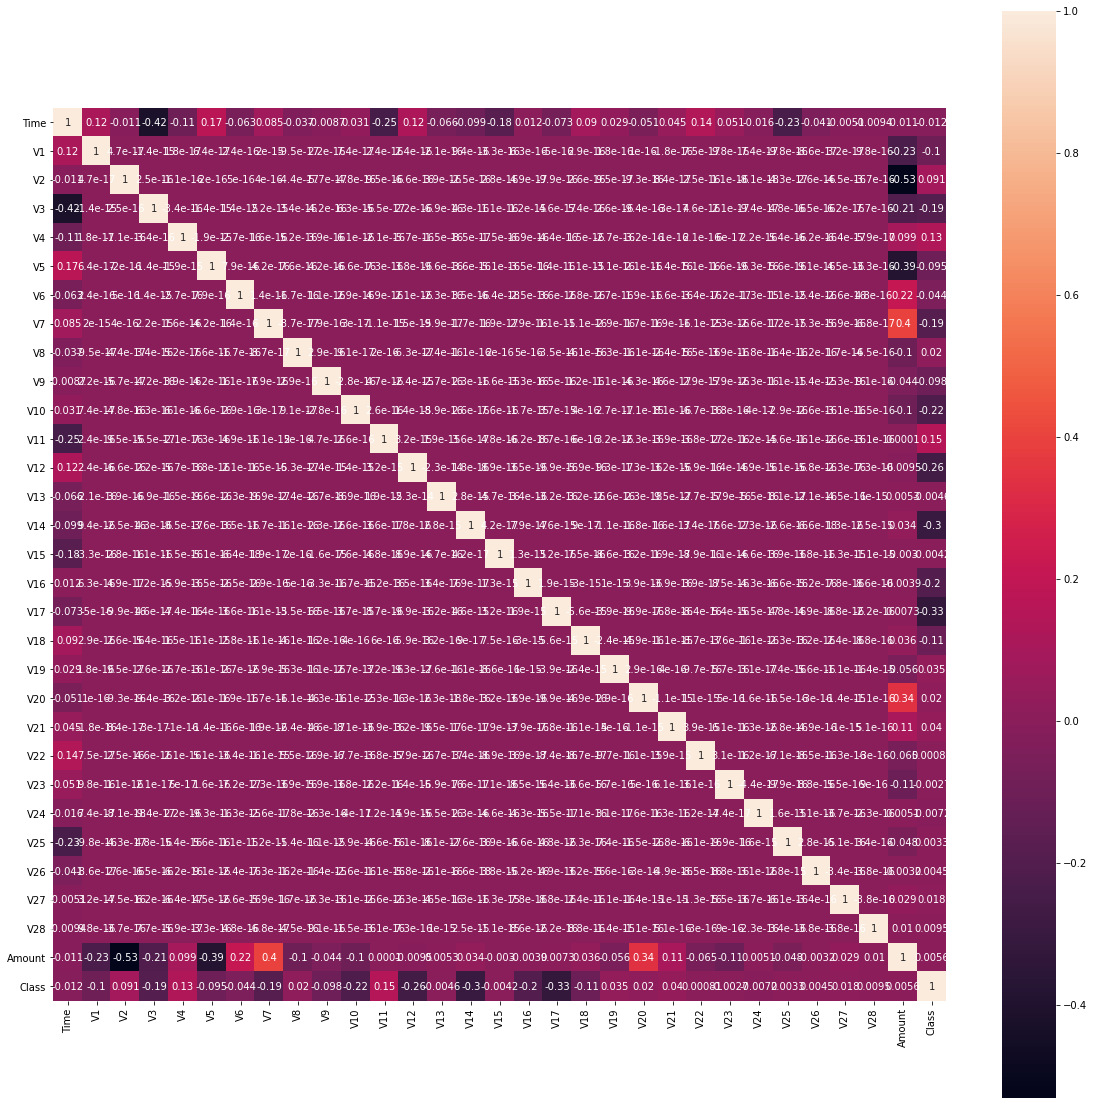

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, square=True)
plt.show()

oversampling

In [17]:
from imblearn.combine import SMOTETomek

In [18]:
X = data.drop(['Class'], axis=1)
Y = data['Class']

In [19]:
smk = SMOTETomek(random_state=42)
x_res, y_res = smk.fit_sample(X, Y)

In [20]:
x_res.shape

(567562, 30)

In [21]:
y_res.shape

(567562,)

In [22]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(397293, 30)
(170269, 30)


Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [46]:
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predicted = clf.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
accuracy_score(predicted, y_test)

0.9583658798724372

In [51]:
confusion_matrix(predicted, y_test)

array([[82468,  4426],
       [ 2663, 80712]])

In [52]:
from sklearn.svm import SVC
clf = SVC()

In [ ]:
clf.fit(x_train, y_train)